In [1]:
!nvidia-smi


Wed May 31 14:07:57 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.41                 Driver Version: 531.41       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2070 S...  WDDM | 00000000:08:00.0  On |                  N/A |
| 22%   31C    P8               17W / 215W|   1664MiB /  8192MiB |      5%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [82]:
import os
HOME = os.getcwd()
print(HOME)
import numpy as np
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO

from IPython.display import display, Image

Ultralytics YOLOv8.0.109  Python-3.9.12 torch-2.0.1+cpu CPU
Setup complete  (24 CPUs, 31.9 GB RAM, 171.3/232.1 GB disk)


# cnc_box (yolo v8)

In [7]:

from roboflow import Roboflow
rf = Roboflow(api_key="KH4LEyK7llh38fCPDKsX")
project = rf.workspace("project-goyvd").project("cnc_box")
dataset = project.version(1).download("yolov8")
model = project.version(1).model

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.109, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to cnc_box-1 in yolov8:: 100%|██████████| 218/218 [00:00<00:00, 2408.45it/s]


In [14]:
from roboflow import Roboflow
rf = Roboflow(api_key="KH4LEyK7llh38fCPDKsX")
project = rf.workspace().project("cnc_box")
model = project.version(1).model

# infer on a local image
# print(model.predict("f_1_4 (2).jpg", ,confidence=40, overlap=30).json())

# # visualize your prediction
model.predict("f_1_4 (2).jpg", confidence=40, overlap=30).save("prediction.jpg")


loading Roboflow workspace...
loading Roboflow project...


C:\Users\31083\Desktop\cnc


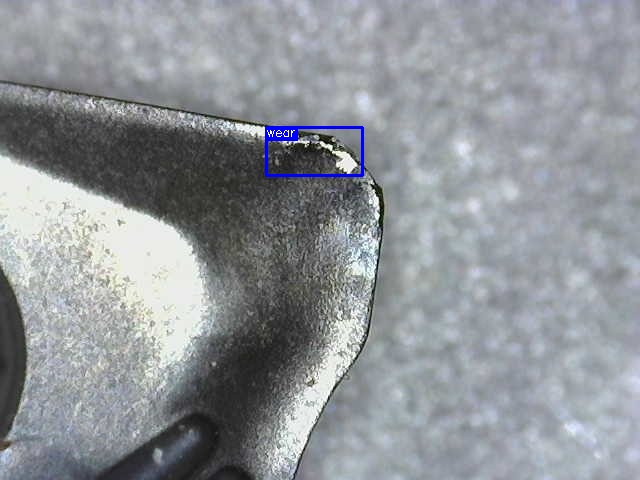

In [15]:
%cd {HOME}
Image(filename='prediction.jpg', height=600)

# yolov8

In [11]:
import wandb

In [12]:
wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: potatopotato (expect). Use `wandb login --relogin` to force relogin


True

## train

In [8]:
# train

%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=20 imgsz=324

C:\Users\31083\Desktop\cnc


New https://pypi.org/project/ultralytics/8.0.107 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.105  Python-3.9.13 torch-2.0.0+cu118 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)
yolo\engine\trainer: task=segment, mode=train, model=yolov8s-seg.pt, data={dataset.location}/data.yaml, epochs=20, patience=50, batch=16, imgsz=324, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, ret

C:\Users\31083\Desktop\cnc


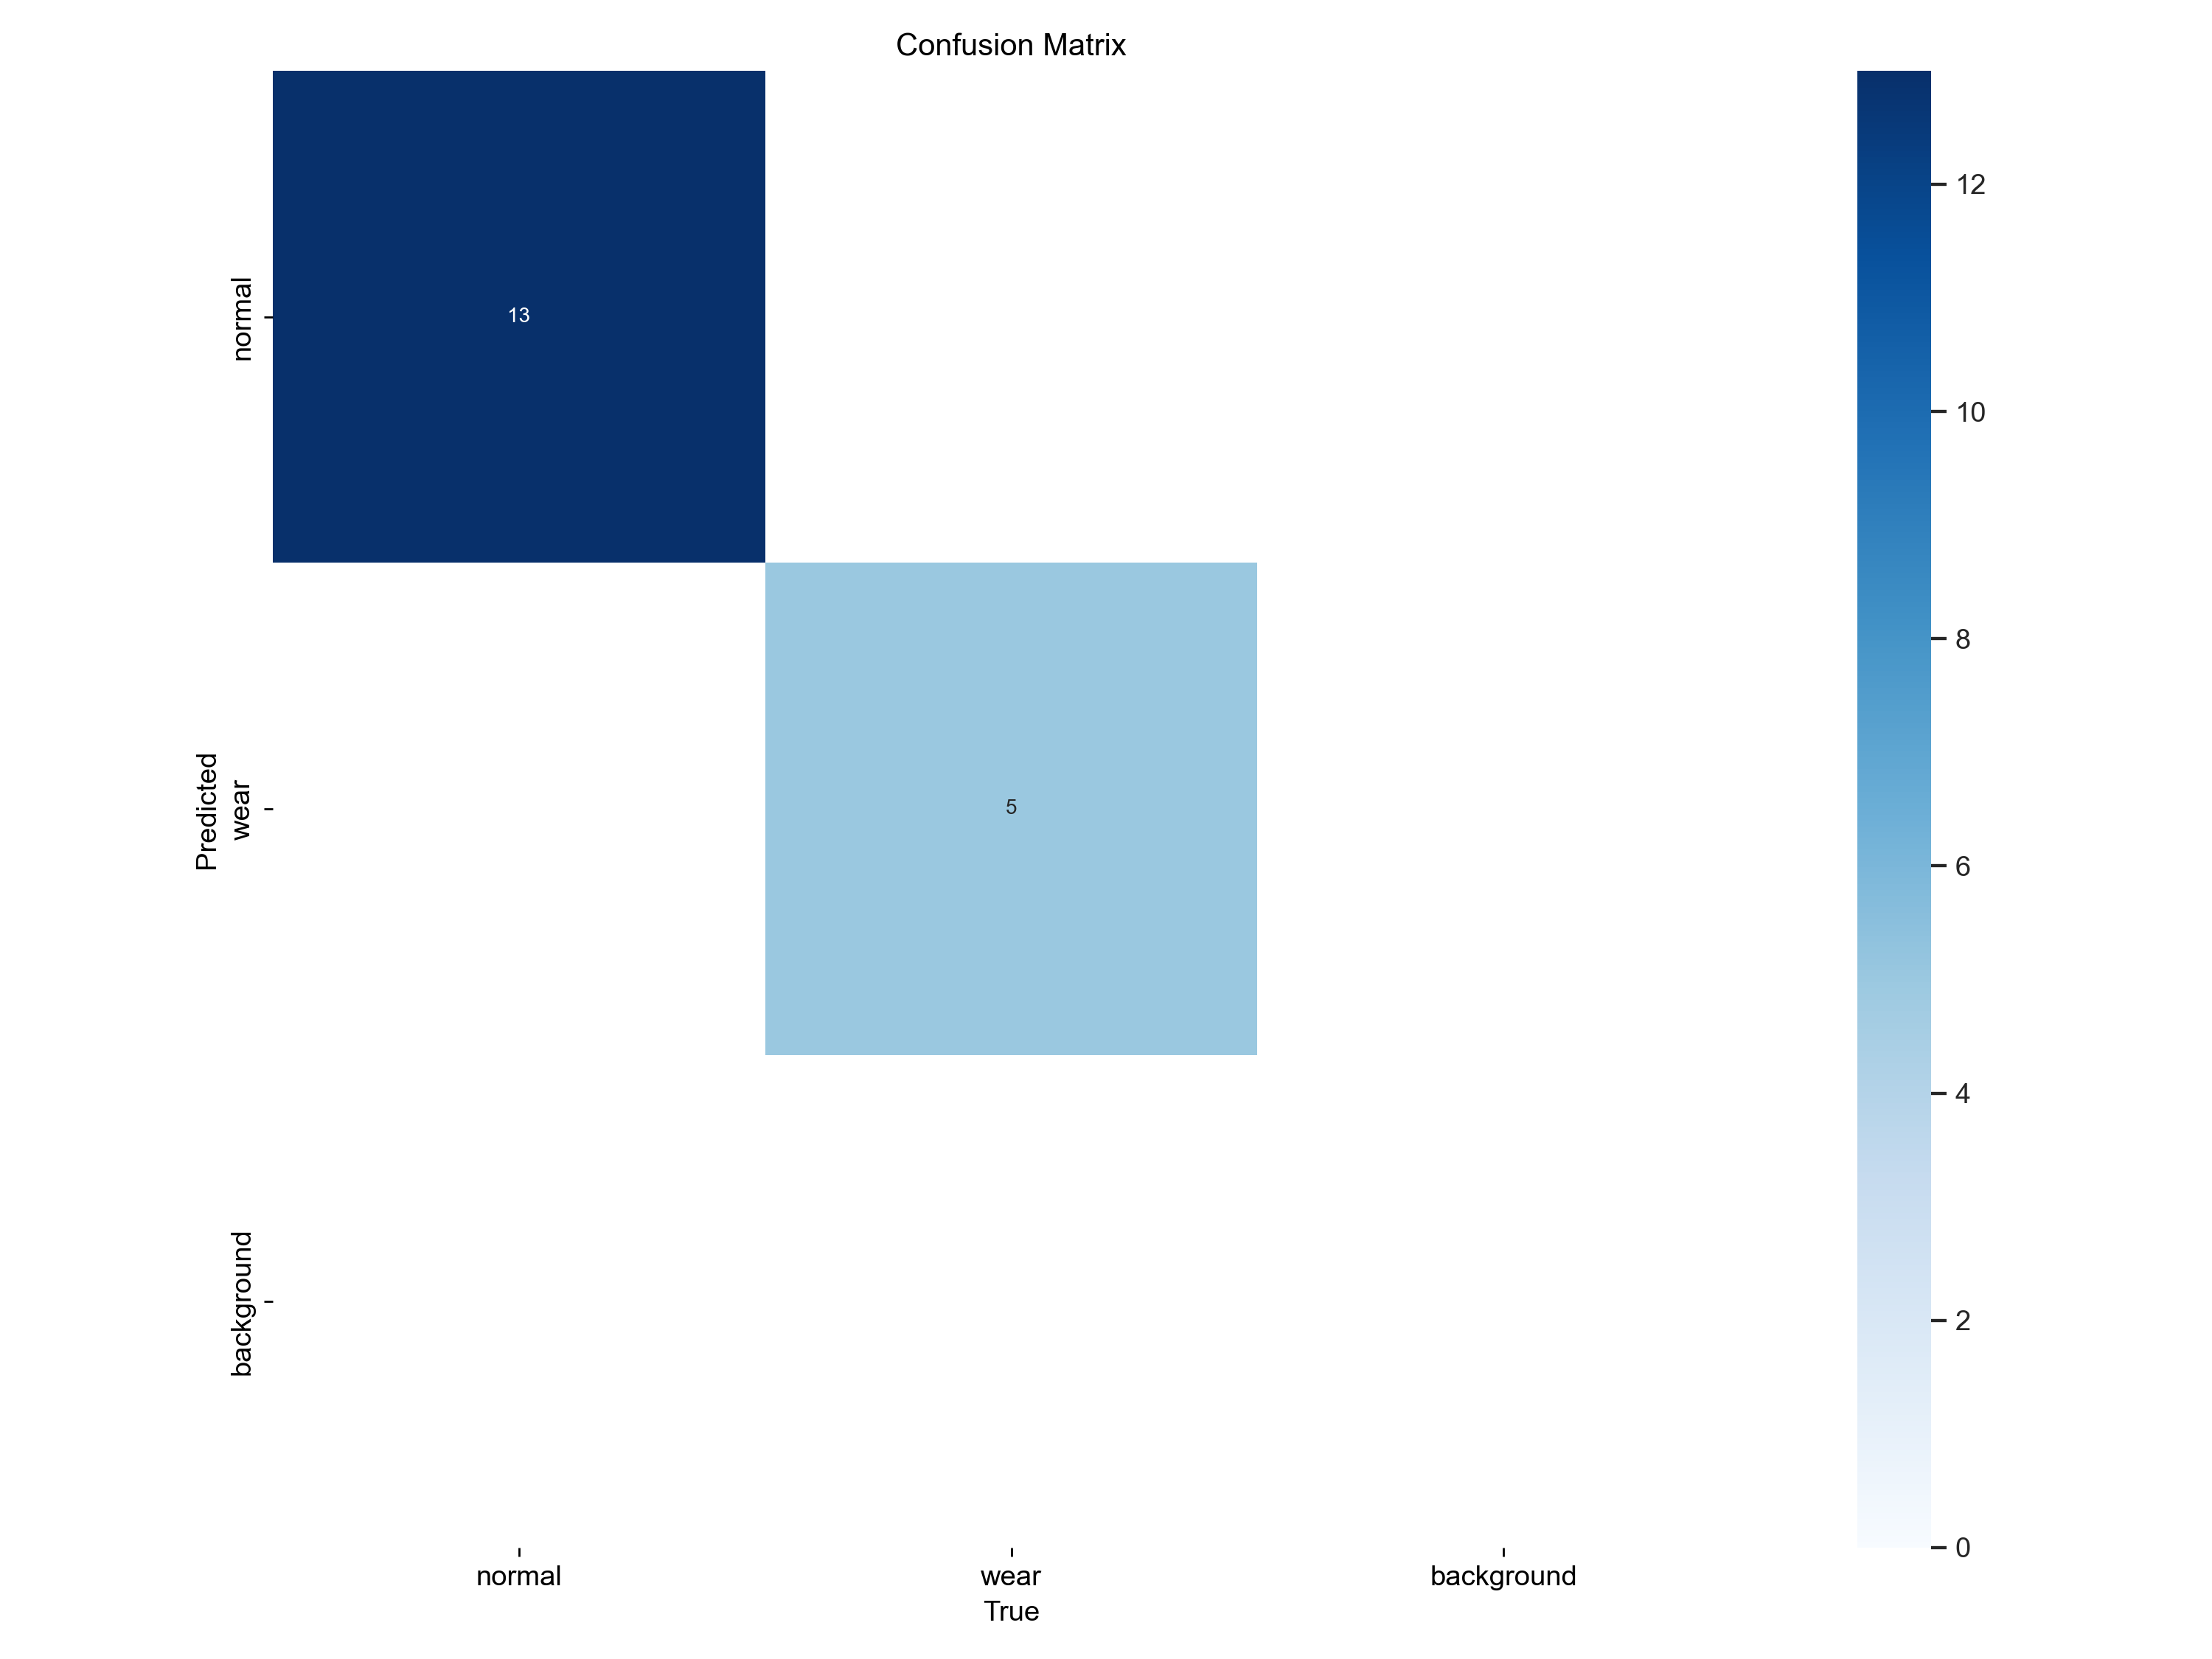

In [31]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train11/confusion_matrix.png', width=1200)

## val

In [25]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train11/weights/best.pt data={dataset.location}/data.yaml

C:\Users\31083\Desktop\cnc


Ultralytics YOLOv8.0.105  Python-3.9.13 torch-2.0.0+cu118 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780374 parameters, 0 gradients

val: Scanning C:\Users\31083\Desktop\cnc\cnc_box-1\valid\labels.cache... 8 images, 0 backgrounds, 0 corrupt: 100%|##########| 8/8 [00:00<?, ?it/s]
val: Scanning C:\Users\31083\Desktop\cnc\cnc_box-1\valid\labels.cache... 8 images, 0 backgrounds, 0 corrupt: 100%|##########| 8/8 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|##########| 1/1 [00:07<00:00,  7.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|##########| 1/1 [00:07<00:00,  7.

## predict

In [ ]:
C:\Users\31083\Desktop\cnc\runs

In [7]:
%cd {HOME}
!yolo task=segment mode=predict model= C:/Users/31083/Desktop/cnc/runs/segment/train11/weights/best.pt conf=0.25 source={HOME}/test save=true

C:\Users\31083\Desktop\cnc\yolo


Ultralytics YOLOv8.0.109  Python-3.9.12 torch-2.0.1+cpu CPU
YOLOv8s-seg summary (fused): 195 layers, 11780374 parameters, 0 gradients

image 1/80 C:\Users\31083\Desktop\cnc\yolo\test\f_1_1 (1).jpg: 288x352 2 normals, 3 wears, 112.5ms
image 2/80 C:\Users\31083\Desktop\cnc\yolo\test\f_1_1 (2).jpg: 288x352 2 normals, 80.4ms
image 3/80 C:\Users\31083\Desktop\cnc\yolo\test\f_1_2 (1).jpg: 288x352 2 normals, 1 wear, 80.4ms
image 4/80 C:\Users\31083\Desktop\cnc\yolo\test\f_1_2 (2).jpg: 288x352 3 normals, 1 wear, 80.9ms
image 5/80 C:\Users\31083\Desktop\cnc\yolo\test\f_1_3 (1).jpg: 288x352 2 normals, 1 wear, 70.7ms
image 6/80 C:\Users\31083\Desktop\cnc\yolo\test\f_1_3 (2).jpg: 288x352 2 normals, 1 wear, 70.3ms
image 7/80 C:\Users\31083\Desktop\cnc\yolo\test\f_1_4 (1).jpg: 288x352 3 normals, 1 wear, 78.4ms
image 8/80 C:\Users\31083\Desktop\cnc\yolo\test\f_1_4 (2).jpg: 288x352 1 normal, 1 wear, 80.4ms
image 9/80 C:\Users\31083\Desktop\cnc\yolo\test\f_1_5 (1).jpg: 288x352 2 normals, 1 wear, 90.9ms

## predict_result

In [9]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolo/runs/segment/predict/*.jpg')[:8]:
      display(Image(filename=image_path, height=600))
      print("\n")

In [83]:
# Load a model

model = YOLO('C:/Users/31083/Desktop/cnc/runs/segment/train11/weights/best.pt')  # load a custom model

results = model.predict(source='C:/Users/31083/Desktop/cnc/f_1_4 (2).jpeg', conf=0.25)

In [153]:
#모델의 결과값 및 라벨값 저장

result = model.predict('C:/Users/31083/Desktop/cnc/yolo/f_1_3 (2).jpg',save_txt = True,save = True)


image 1/1 C:\Users\31083\Desktop\cnc\yolo\f_1_3 (2).jpg: 288x352 2 normals, 1 wear, 86.4ms
Speed: 1.0ms preprocess, 86.4ms inference, 2.0ms postprocess per image at shape (1, 3, 352, 352)
Results saved to runs\segment\predict3
2 labels saved to runs\segment\predict3\labels


In [154]:
import pandas as pd

# 텍스트 파일 경로
file_path = 'C:/Users/31083/Desktop/cnc/yolo/runs/segment/predict3/labels/f_1_3 (2).txt'

# 텍스트 파일 불러오기
with open(file_path, 'r') as f:
    lines = f.readlines()

# 데이터 추출
data = []
label = None

for line in lines:
    line = line.strip()
    if line.startswith('0') or line.startswith('1'):
        if label is not None and values:
            data.append([label] + values)
        label_values = line.split()
        label = int(label_values[0])
        values = [float(value) for value in label_values[1:]]
    else:
        values.extend([float(value) for value in line.split()])

# 마지막 라벨에 대한 값 추가
if label is not None and values:
    data.append([label] + values)

# 데이터 프레임 생성
df = pd.DataFrame(data)

In [155]:
df

,0,1,2,3,4,5,6,7,8,9,...,189,190,191,192,193,194,195,196,197,198
0,1,0.434659,0.333333,0.428977,0.340909,0.426136,0.340909,0.420455,0.348485,0.414773,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0.301136,0.363636,0.298295,0.367424,0.286932,0.367424,0.284091,0.371212,0.278409,...,0.403409,0.375000,0.403409,0.367424,0.400568,0.367424,0.397727,0.363636,NaN,NaN
2,0,0.576705,0.484848,0.573864,0.488636,0.571023,0.488636,0.571023,0.511364,0.568182,...,0.593750,0.496212,0.590909,0.492424,0.590909,0.488636,0.588068,0.488636,0.585227,0.484848


In [156]:


df_0 = df[df[0] == 0]
df_1 = df[df[0] == 1]

label_0  = df_0[0]
df_0.index = label_0

label_1  = df_1[0]
df_1.index = label_1


df_0 = df_0.transpose()
df_1 = df_1.transpose()

df_0 = df_0.drop(df_0.index[0])
df_1 = df_1.drop(df_1.index[0])

print(df_0)
print(df_1)

0           0         0
1    0.301136  0.576705
2    0.363636  0.484848
3    0.298295  0.573864
4    0.367424  0.488636
5    0.286932  0.571023
..        ...       ...
194  0.367424  0.488636
195  0.397727  0.588068
196  0.363636  0.488636
197       NaN  0.585227
198       NaN  0.484848

[198 rows x 2 columns]
0           1
1    0.434659
2    0.333333
3    0.428977
4    0.340909
5    0.426136
..        ...
194       NaN
195       NaN
196       NaN
197       NaN
198       NaN

[198 rows x 1 columns]


In [159]:
df_1

,1
1,0.434659
2,0.333333
3,0.428977
4,0.340909
5,0.426136
...,...
194,NaN
195,NaN
196,NaN
197,NaN


In [168]:
#정상으로 탐지된 개수
nor = df_0.count().sum()
print('normal :',nor)

#마모으로 탐지된 개수
wear = df_1.count().sum()
print('wear :', wear)

# 마모의 비율.
print(f"Wear Ratio: {round(wear/(nor+wear),3) * 100}%")

normal : 394
wear : 130
Wear Ratio: 24.8%


In [118]:
nor = df_0.count().sum()

In [119]:
wear = df_1.count().sum()

In [125]:
wear/(nor+wear)

0.3053435114503817

import pickle

results = a  # 주어진 결과값을 results 변수에 저장하십시오.

 결과 객체를 로컬에 저장
with open('results.pkl', 'wb') as f:
    pickle.dump(results, f)


import pickle

# 결과 객체를 로드
with open('results.pkl', 'rb') as f:
    loaded_results = pickle.load(f)


loaded_results

masks = loaded_results[0].masks

masks